# IMDb Top 1000 - Exploratory analysis and visualization


## By Minh Nguyet Nguyen (Selene)

This project is an exploratory analysis and visualization of the IMDb Top 1000 dataset using Python. The goal of this project is to provide insights into the data and visualize patterns and relationships in the dataset.

## Dataset
The IMDb dataset used in this project contains information about movies and their released year, certificate, runtime, genre, IMDb rating, overview, meta score, director, stars, number of votes, and gross box office.

This project mainly explore movies' genre, IMDb rating, director, and gross box office.

Data source: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

## Libraries
Libraries used in this project:
* pandas
* matplotlib
* seaborn

## Sections
The notebook contains the following sections:
* Exploratory data analysis
* Visualization

## Results
The analysis and visualizations in this project provide insights into the IMDb dataset, including:
* The distribution of movie ratings
* The top most popular movie genres
* The relationship between IMDB ratings and gross box office
* The gross box office for most popular genres
* The most successful movie directors

## Conclusion
This project demonstrates the power of exploratory analysis and visualization in providing insights into datasets. The analysis and visualizations can be used to inform decisions in the film industry, such as which movie genres and directors are the most successful.

In [208]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
# Import the dataset

df = pd.read_csv("/Users/nmn/Downloads/imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


# Exploratory Data Analysis

In [210]:
# Shape of the dataset

df.shape

(1000, 16)

In [211]:
# Data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [212]:
# Basic statistics

df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [234]:
# Missing data

df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

# Visualizations

## Distributions 

<AxesSubplot:xlabel='IMDB_Rating', ylabel='count'>

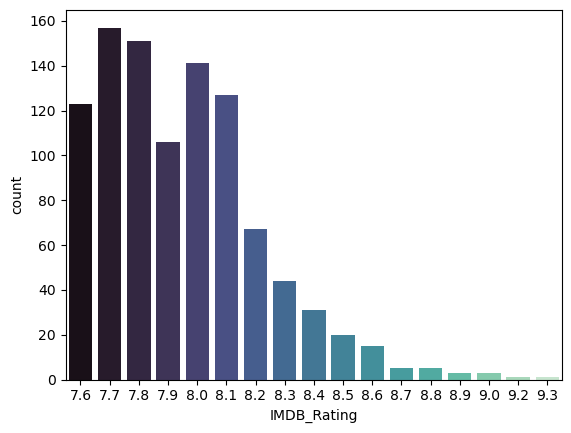

In [263]:
# Distribution of movies ratings

sns.countplot(x='IMDB_Rating', palette='mako', data = df)

The distribution of movies ratings is left-skewed, implying that the majority of movies receive ratings from 7.6 to 8.1. There are 2 outliers receving ratings 9.2 and 9.3.  

<AxesSubplot:xlabel='Count', ylabel='Genre'>

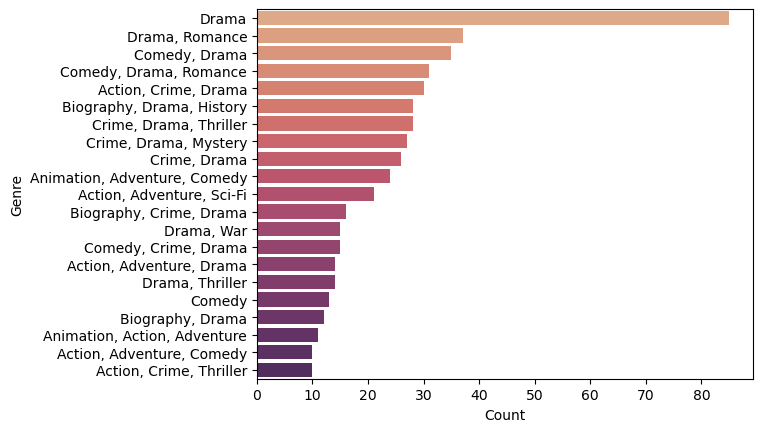

In [264]:
# Top 20 most popular genres

genre_df = pd.DataFrame(df.Genre.value_counts()[0:21,]) # Create a dataframe containing the 20 most popular genres
# Popularity here is based on number of occurences

genre_df = genre_df.reset_index()
genre_df = genre_df.rename(columns={'index': 'Genre', 'Genre': 'Count'})

sns.barplot(x='Count', y='Genre', palette='flare', data=genre_df)

The most popular genre - Drama - accounts for the majority of movies in the dataset. It is interesting that top 5 most popular genre are all drama-related.

## Relationships

<AxesSubplot:xlabel='IMDB_Rating', ylabel='Gross'>

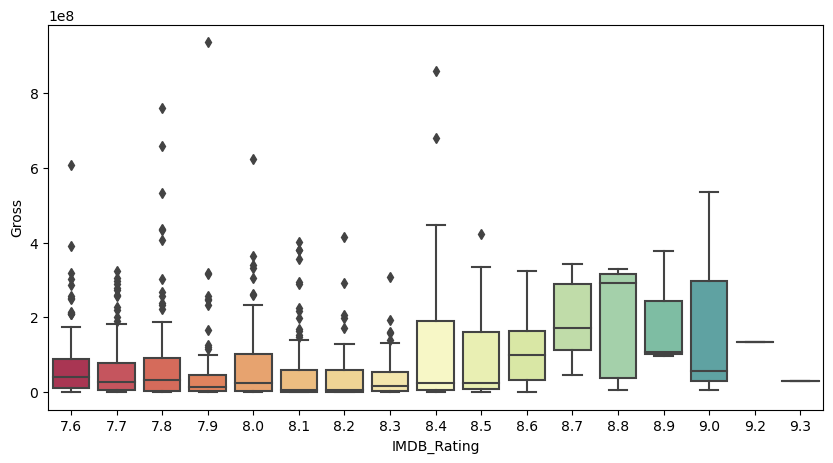

In [265]:
# Relationship between IMDB ratings and gross box office

df1 = df.copy()
df1 = df1.dropna(subset=['Gross']) # Drop missing values in the Gross column
# Reformat the data so that Gross is a numerical variable
df1['Gross'] = df1['Gross'].apply(lambda x: int(x.replace(",","")))
df1 = df1.sort_values('IMDB_Rating')
# Reformat the data so that IMDB_Rating is a categorical variable
df1['IMDB_Rating'] = df1['IMDB_Rating'].apply(lambda x: str(x))

# Distribution of Gross box office across different IMDB Ratings
plt.figure(figsize=(10,5))
sns.boxplot(x='IMDB_Rating', y='Gross', palette="Spectral", data=df1)

For movies with lower ratings, there are more outliers in the dataset regarding to their gross box office. The movie with highest gross box office only received a rating of 7.9.

<AxesSubplot:xlabel='IMDB_Rating', ylabel='Gross'>

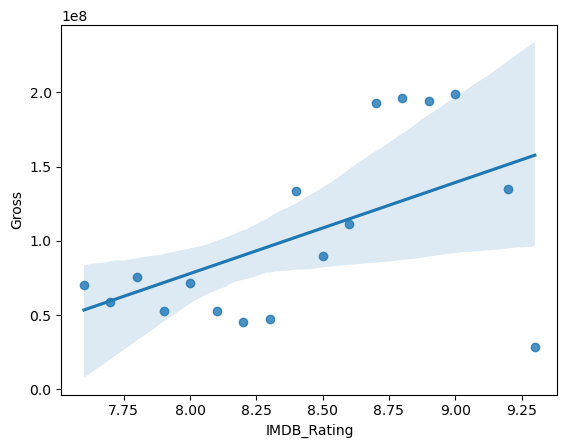

In [245]:
# Relationship between IMDB ratings and gross box office (continue)

# Create a dataframe showing mean gross box office for each IMDB rating
df_rating = df1.groupby('IMDB_Rating').mean().reset_index()
# Reformat data so that IMDB_Rating is a numerical variable
df_rating['IMDB_Rating'] = df_rating['IMDB_Rating'].apply(lambda x: float(x))

sns.regplot(x='IMDB_Rating', y='Gross', data=df_rating)

There is some positive correlation between movies' IMDb ratings and their gross box office, even though the relationship is weak.

<AxesSubplot:xlabel='Gross', ylabel='Genre'>

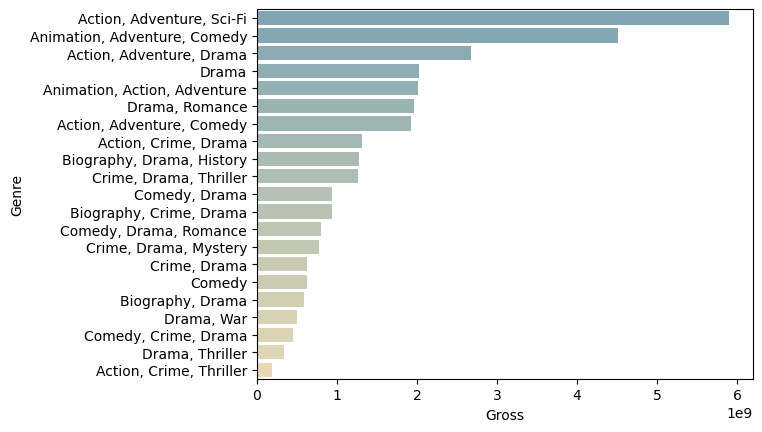

In [267]:
# Gross box office of 20 most popular genres

# Create a data frame showing sum gross box office for each genre
df_genre = df1.groupby('Genre').sum().reset_index()

# Create a data frame consisting of the 20 most popular genres and their gross box office
df_genre = genre_df.merge(df_genre, how='left', on='Genre')
df_genre = df_genre.sort_values('Gross', ascending=False)

sns.barplot(x='Gross', y='Genre', palette='blend:#7AB,#EDA', data=df_genre)

Althoguh Drama is the most popular genre, it is only the 4th-highest gross genre. Action, Adventure, Sci-Fi is the highest-gross movie genre, followed by Animation, Adventure, Comedy. In general, genres relating to adventure and action are the higher-gross generating genres.

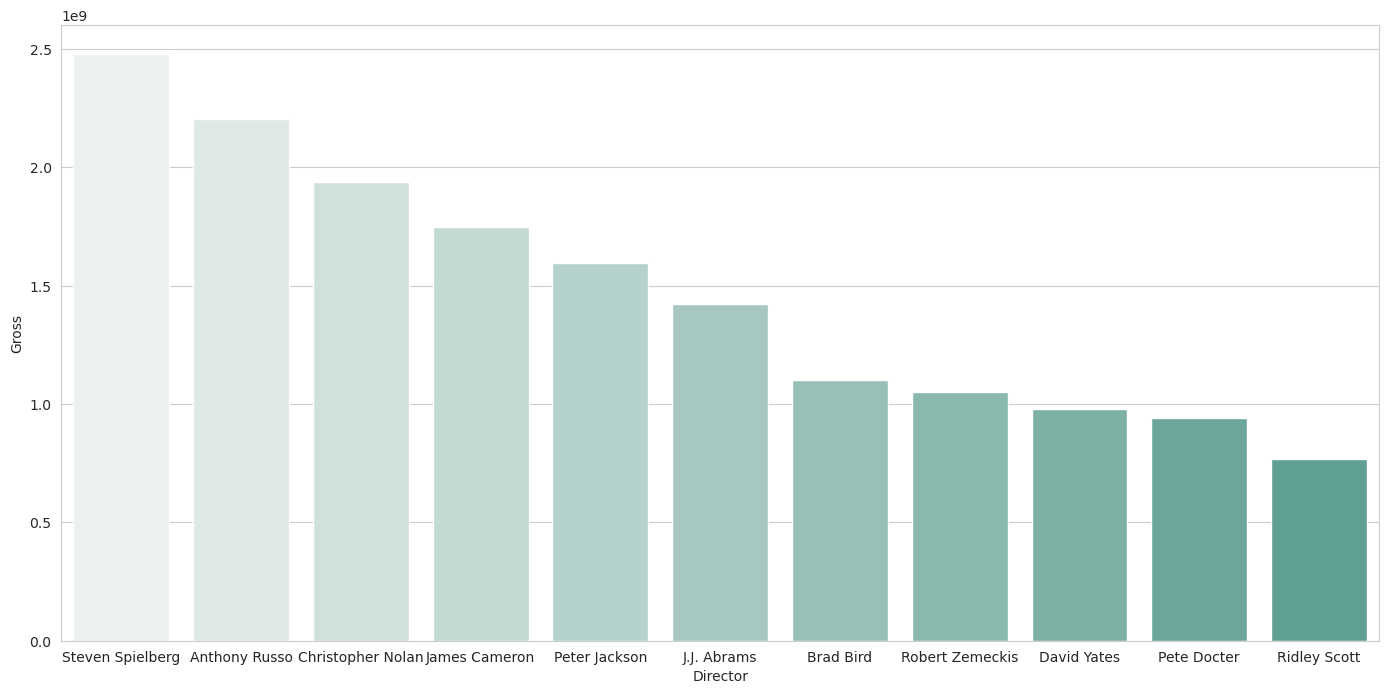

In [268]:
# Gross box office of the top 10 directors

# Create a data frame showing sum gross box office for each director
df_director = df1.groupby('Director').sum().sort_values('Gross', ascending=False).reset_index()
# Limit the data to only the 10 highest-gross directors
df_director = df_director[:11]

plt.figure(figsize=(17,8))
with sns.axes_style("whitegrid"):
    sns.barplot(x='Director',y='Gross', palette='light:#5A9', data=df_director)

Steven Spielberge is a highest-gross director, taken into account all gross box office from his movies. The highest-gross directors aligns with the highest-gross genres (relating to action and adventure).

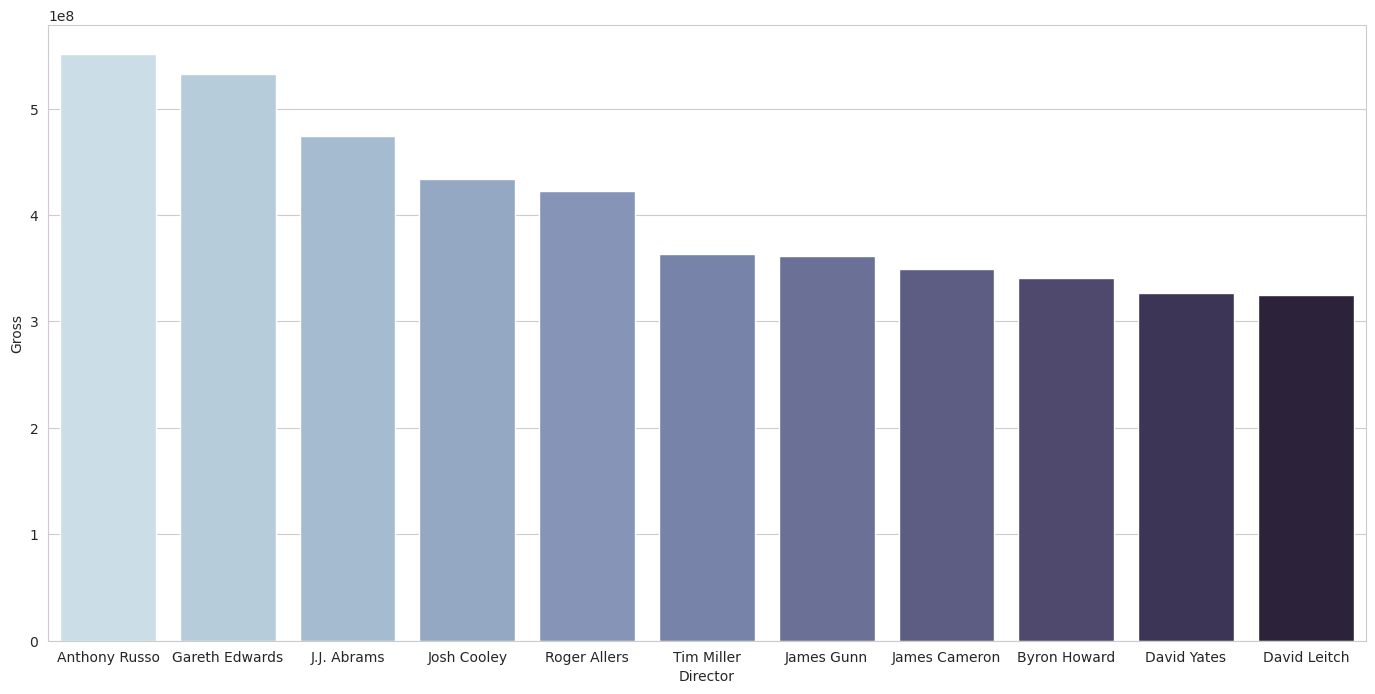

In [270]:
# Gross box office of the top 10 directors (Continue) 

# Create a data frame showing average gross box office per movie for each director
df_director1 = df1.groupby('Director').mean().sort_values('Gross', ascending=False).reset_index()
# Limit the data to only the 10 highest-gross directors
df_director1 = df_director1[:11]

plt.figure(figsize=(17,8))
with sns.axes_style("whitegrid"):
    sns.barplot(x='Director',y='Gross', palette='ch:s=.25,rot=-.25', data=df_director1)

Anthony Russo is the highest-gross-per-movie director, taken into account the average gross per movie. The top 10 differs considerably from the top 10 highest-gross directors. Steven Spielberge, despite having the highest gross from all his movies, is not in the top 10 highest-gross-per-movie directors.